In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (50.0, 20.0)
plt.rcParams.update({'font.size': 22})

In [57]:
# Grab and process the raw data - test
data_path = ("/Users/evarubin/Dev/thinkful/data/01-bootcamp-data/unit2/sentiment-labelled-sentences/amazon_cells_labelled.txt"
            )
# hold out data
data_path_2 = ("/Users/evarubin/Dev/thinkful/data/01-bootcamp-data/unit2/sentiment-labelled-sentences/imdb_labelled.txt"
            )
amazon_cells_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
imdb_cells_raw = pd.read_csv(data_path_2, delimiter= '\t', header=None)


In [58]:
# Name the columns
amazon_cells_raw.columns = ['review', 'positive']

In [59]:
# Look for keywords that might intuitively indicate positive Amazon review and create feature variable keywords

keywords = ['good', 'very good', 'great', 'excellent', 'quality', 'highly']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_cells_raw[str(key)] = amazon_cells_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [25]:
amazon_cells_raw_pos = amazon_cells_raw.loc[amazon_cells_raw['positive'] == 1]


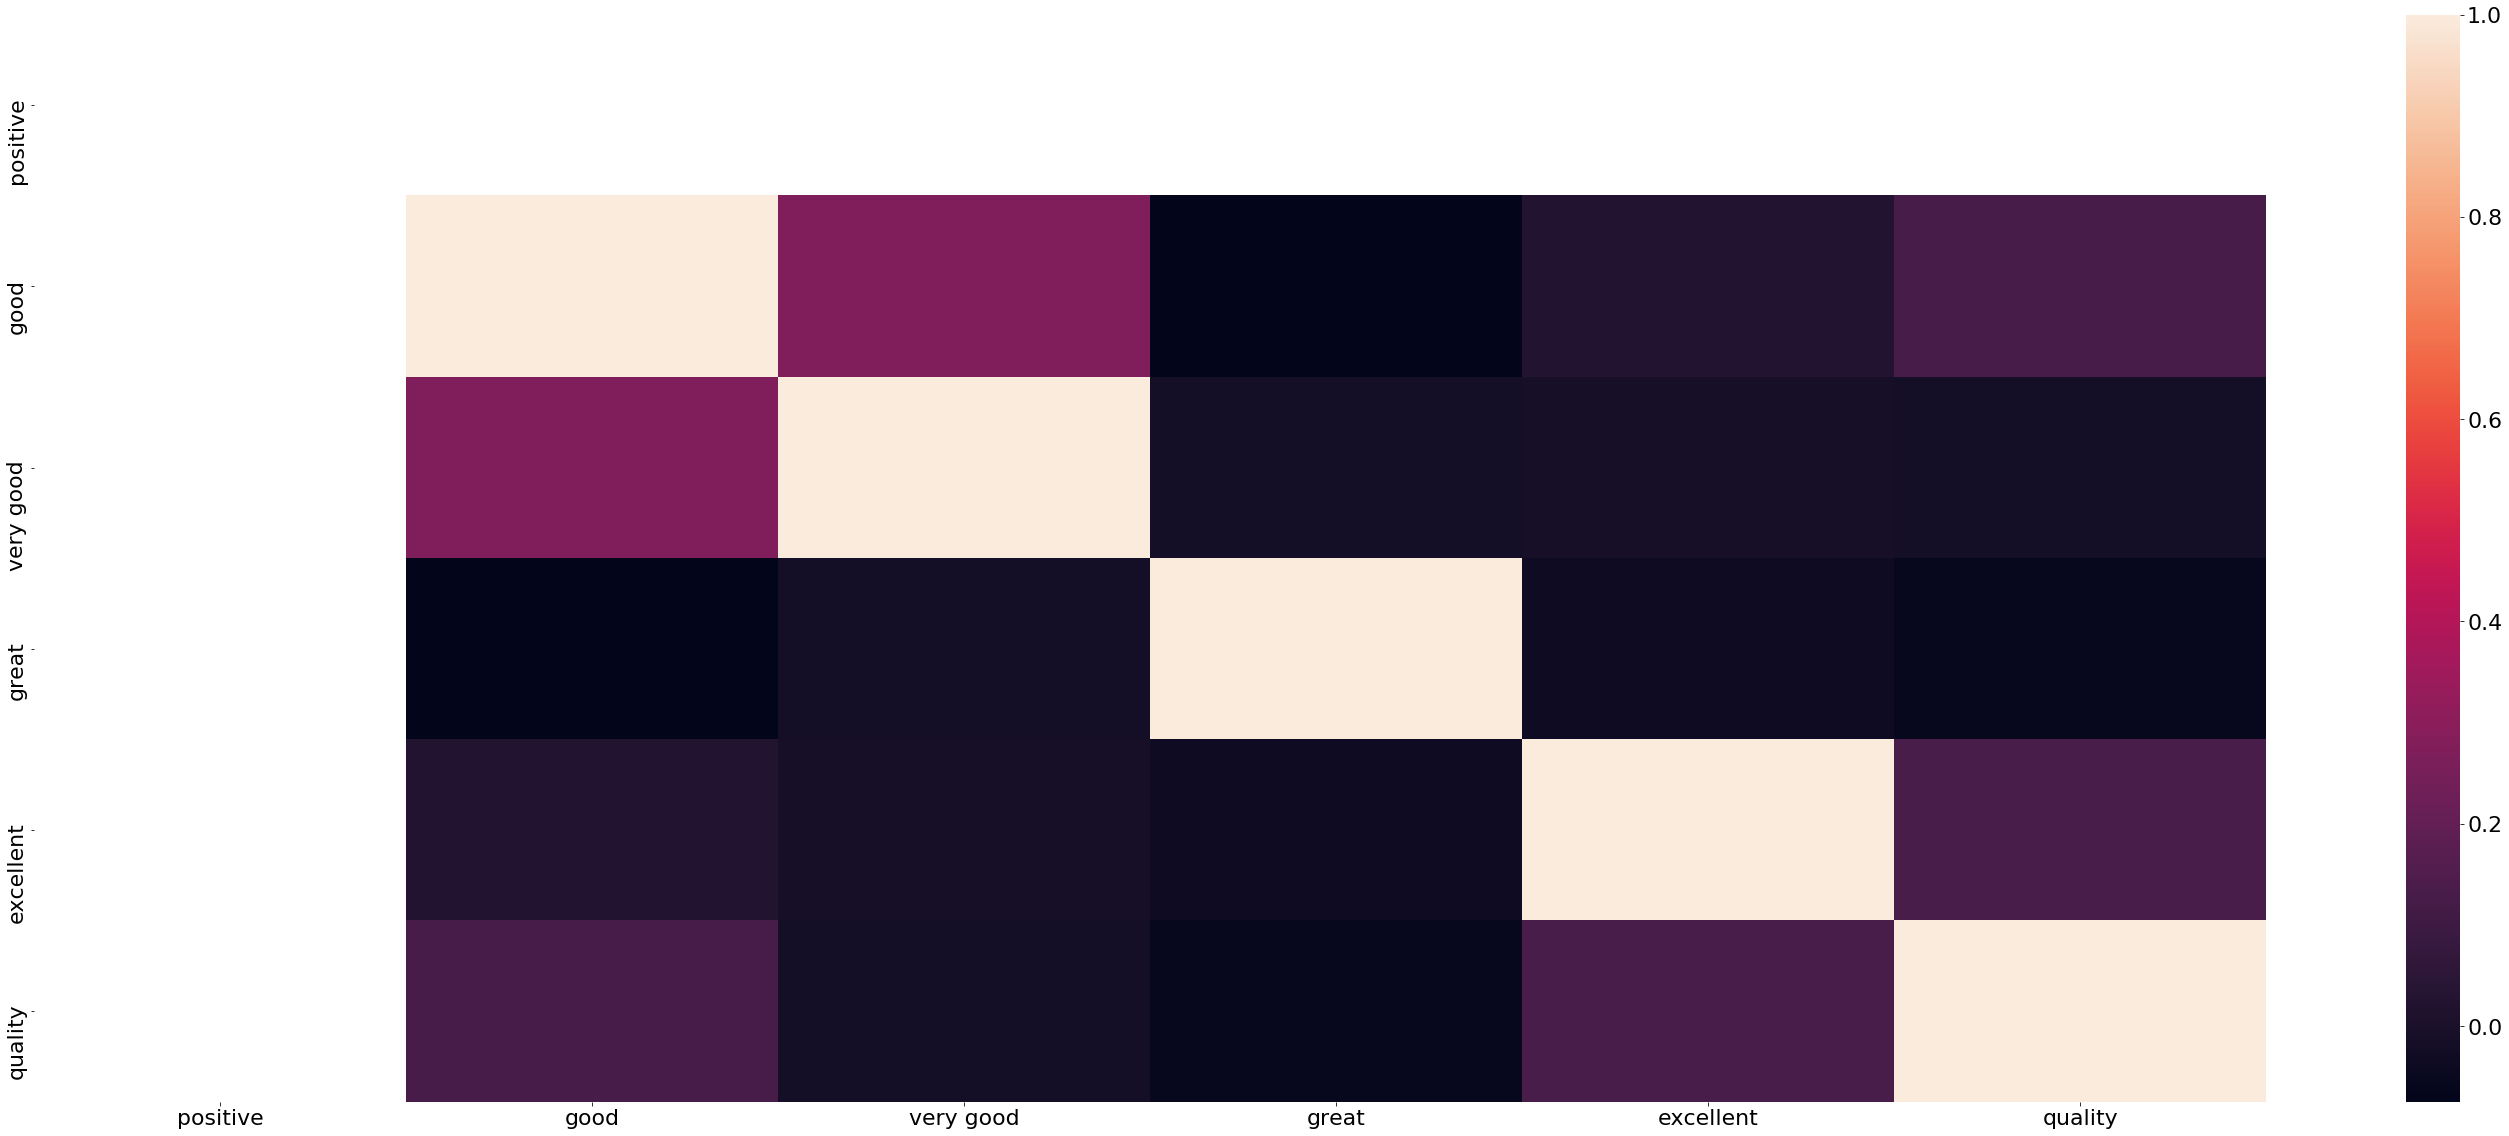

In [60]:
sns.heatmap(amazon_cells_raw_pos.corr());

In [61]:
# Identify the data using 
data = amazon_cells_raw[keywords]
target = amazon_cells_raw['positive']

In [62]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 428


In [63]:
# Name the imdb columns
imdb_cells_raw.columns = ['imdb_review', 'imdb_positive']

In [64]:
# Look for keywords that might intuitively indicate positive Amazon review and create feature variable keywords

keywords_2 = ['good', 'very good', 'great', 'excellent', 'quality', 'highly']

for key in keywords_2:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    imdb_cells_raw[str(key)] = imdb_cells_raw.imdb_review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [65]:
# Identify the data using 
data_2 = imdb_cells_raw[keywords_2]
target_2 = imdb_cells_raw['imdb_positive']

In [66]:
# Classify, storing the result in a new variable.
y_pred_2 = bnb.predict(data_2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target_2 != y_pred_2).sum()
))

Number of mislabeled points out of a total 1000 points : 348
